# CS105 Final Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.cluster import KMeans 

Read Data In.

In [2]:
df = pd.read_csv('jeopardy.csv')
df.head(25)

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
5,4680,2004-12-31,Jeopardy!,3-LETTER WORDS,$200,"In the title of an Aesop fable, this insect sh...",the ant
6,4680,2004-12-31,Jeopardy!,HISTORY,$400,Built in 312 B.C. to link Rome & the South of ...,the Appian Way
7,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$400,"No. 8: 30 steals for the Birmingham Barons; 2,...",Michael Jordan
8,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$400,"In the winter of 1971-72, a record 1,122 inche...",Washington
9,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$400,This housewares store was named for the packag...,Crate & Barrel


Specify subsets, here we're only going to look at these specific values.

In [3]:
df = df[['Round', 'Value', 'Question', 'Answer']]
df.head(5)

,Round,Value,Question,Answer
0,Jeopardy!,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,Jeopardy!,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,Jeopardy!,$200,The city of Yuma in this state has a record av...,Arizona
3,Jeopardy!,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,Jeopardy!,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


Clean Data to remove Instances of Final Jeopary and 'None' Values, as they do not factor into our calculations.

In [4]:
df = df[~df.Round.str.contains('Final')]
df = df[~df.Value.str.contains('None')]

Create new columns for both `Words in Question` and `Words in Answer` by spliting strings in cells by the amount of spaces.  This creates a list with all words in a cell, then counting the size of that list with the `len()` function gives us the amount of words in each cell.

In [5]:
df['Words in Question'] = df['Question'].str.split().str.len()
df['Words in Answer'] = df['Answer'].str.split().str.len()

Remove all rows that have Nan in "Words in Answer" 

In [6]:
df = df[df['Words in Answer'].notna()]

Notice that Value is currently being treated as categorical variable. Clean up this column and cast them to a float because we'll need to perform mathematical operations on these columns.

In [7]:
df['Value'] = df['Value'].str.replace('$','').str.replace(',', '').astype(float)
df

C:\Users\User\AppData\Local\Temp\ipykernel_13796\2060277076.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Value'] = df['Value'].str.replace('$','').str.replace(',', '').astype(float)


,Round,Value,Question,Answer,Words in Question,Words in Answer
0,Jeopardy!,200.0,"For the last 8 years of his life, Galileo was ...",Copernicus,18,1.0
1,Jeopardy!,200.0,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,19,2.0
2,Jeopardy!,200.0,The city of Yuma in this state has a record av...,Arizona,18,1.0
3,Jeopardy!,200.0,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,14,1.0
4,Jeopardy!,200.0,"Signer of the Dec. of Indep., framer of the Co...",John Adams,18,2.0
...,...,...,...,...,...,...
216924,Double Jeopardy!,2000.0,In 2006 the cast of this long-running hit emba...,Stomp,22,1.0
216925,Double Jeopardy!,2000.0,This Puccini opera turns on the solution to 3 ...,Turandot,14,1.0
216926,Double Jeopardy!,2000.0,In North America this term is properly applied...,a titmouse,18,2.0
216927,Double Jeopardy!,2000.0,"In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker,16,2.0


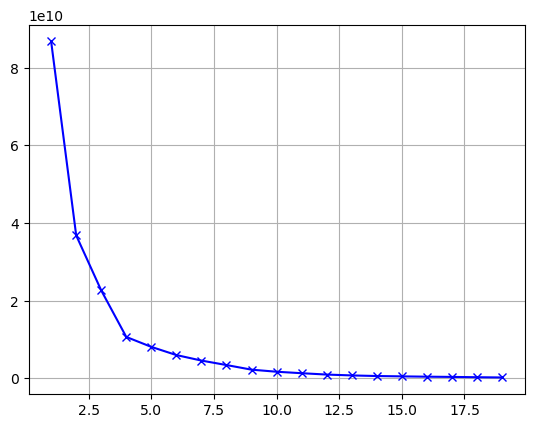

In [8]:
X = df.loc[:, ['Value', 'Words in Question']].values
distorsions = []
K = range(1, 20)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
    
plt.plot(K, distorsions, 'bx-')
plt.grid(True)
plt.show()

In [9]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
kmeans.cluster_centers_

array([[ 360.81967213,   14.04592501],
       [1867.70779171,   15.52174078],
       [ 939.82996559,   14.93421152],
       [5085.40462428,   16.02477291]])

In [10]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 3, 3, 3])

Text(0, 0.5, 'Words in Question')

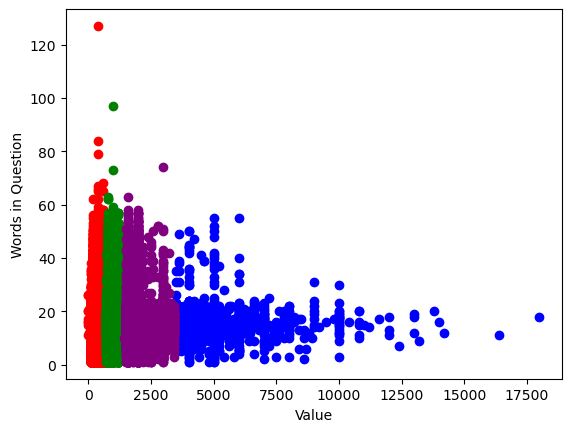

In [11]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'purple')
plt.xlabel('Value')
plt.ylabel('Words in Question')

In [12]:
reviews = pd.read_json('reviews_Amazon_Instant_Video_5.json', lines=True)
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,"[0, 0]",I had big expectations because I love English ...,2,A little bit boring for me,1399075200,"05 3, 2014"
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,"[0, 0]",I highly recommend this series. It is a must f...,5,Excellent Grown Up TV,1346630400,"09 3, 2012"
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""","[0, 1]",This one is a real snoozer. Don't believe anyt...,1,Way too boring for me,1381881600,"10 16, 2013"
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""","[0, 0]",Mysteries are interesting. The tension betwee...,4,Robson Green is mesmerizing,1383091200,"10 30, 2013"
4,A16XRPF40679KG,B000H00VBQ,Michael Dobey,"[1, 1]","This show always is excellent, as far as briti...",5,Robson green and great writing,1234310400,"02 11, 2009"


In [13]:
text = reviews[['reviewText']].copy()
text

,reviewText
0,I had big expectations because I love English ...
1,I highly recommend this series. It is a must f...
2,This one is a real snoozer. Don't believe anyt...
3,Mysteries are interesting. The tension betwee...
4,"This show always is excellent, as far as briti..."
...,...
37121,I love the books! The show is amazing so far. ...
37122,"""The Strain"" has potential to be an excellent ..."
37123,"I'm not real sure on how, I should rate this s..."
37124,episode one so far makes me want to watch more...


In [14]:
bow = pd.Series([y for x in text.values.flatten() for y in x.split()]).value_counts()
bow

the           163170
and            97853
a              84396
to             82187
of             76061
               ...  
d*ck.              1
Schroder's         1
Gosselaar          1
Mark-Paul          1
Salem's            1
Length: 184043, dtype: int64

Convert series to data frame

In [15]:
bow_df = pd.DataFrame({'word':bow.index, 'count':bow.values})
bow_df

,word,count
0,the,163170
1,and,97853
2,a,84396
3,to,82187
4,of,76061
...,...,...
184038,d*ck.,1
184039,Schroder's,1
184040,Gosselaar,1
184041,Mark-Paul,1


Remove punctuation

In [16]:
bow_df['word'] = bow_df['word'].str.replace('[^\w\s]','', regex=True)
bow_df

,word,count
0,the,163170
1,and,97853
2,a,84396
3,to,82187
4,of,76061
...,...,...
184038,dck,1
184039,Schroders,1
184040,Gosselaar,1
184041,MarkPaul,1


Remove words that are not complete alphanumeric

In [20]:
bow_df = bow_df.drop(bow_df[bow_df.word.str.isalnum() == False].index)
bow_df

,word,count
0,the,163170
1,and,97853
2,a,84396
3,to,82187
4,of,76061
...,...,...
184038,dck,1
184039,Schroders,1
184040,Gosselaar,1
184041,MarkPaul,1


In [140]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', min_df=100)

matrix = vectorizer.fit_transform(reviews['reviewText'])
print(matrix)

  (0, 195)	1
  (0, 667)	1
  (0, 1186)	1
  (0, 622)	1
  (0, 2004)	1
  (0, 1394)	1
  (0, 510)	1
  (0, 1859)	1
  (0, 886)	1
  (0, 1568)	1
  (0, 220)	1
  (0, 522)	1
  (0, 115)	1
  (1, 937)	1
  (1, 1575)	1
  (1, 1708)	1
  (1, 2085)	1
  (1, 877)	1
  (1, 1922)	1
  (1, 384)	1
  (1, 308)	1
  (1, 1449)	1
  (1, 1970)	1
  (1, 1036)	1
  (1, 1934)	1
  :	:
  (37124, 792)	1
  (37124, 37)	1
  (37124, 1600)	1
  (37125, 2085)	2
  (37125, 1065)	1
  (37125, 2092)	1
  (37125, 2087)	1
  (37125, 2089)	1
  (37125, 639)	1
  (37125, 1696)	3
  (37125, 1385)	1
  (37125, 1818)	1
  (37125, 1880)	1
  (37125, 561)	1
  (37125, 2047)	1
  (37125, 1291)	2
  (37125, 879)	1
  (37125, 1728)	1
  (37125, 1672)	1
  (37125, 1401)	1
  (37125, 1405)	1
  (37125, 750)	1
  (37125, 1554)	1
  (37125, 1429)	2
  (37125, 959)	1


In [141]:
vectorizer.get_feature_names_out()

array(['10', '100', '11', ..., 'younger', 'zombie', 'zombies'],
      dtype=object)

In [142]:
cdf = vectorizer.fit_transform(reviews['reviewText'])
bag = pd.DataFrame(cdf.toarray(), columns=vectorizer.get_feature_names_out())
bag

,10,100,11,12,13,14,15,16,18,1st,...,wrote,yeah,year,years,yes,york,young,younger,zombie,zombies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
37124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
#Running neural network with a review of 4 or higher being a positive review and a review of 3 or lower being negative
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

x = bag.values
y = reviews['overall'].values
#y = [int(x>3) for x in y]
#print(sum(y))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [154]:
mlp = MLPRegressor(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
print(1)

1


In [155]:
mlp.fit(x_train, y_train)
print(1)

1


In [156]:
predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

In [163]:
from sklearn.metrics import classification_report,confusion_matrix
print('Mean absolute error: ', sum(abs(y_train - predict_train))/len(y_train))
print('Mean squared error: ', sum((y_train - predict_train) * (y_train - predict_train))/len(y_train))

Mean absolute error:  0.28293546160037275
Mean squared error:  0.16882949596856742


In [164]:
print('Mean absolute error: ', sum(abs(y_test - predict_test))/len(y_train))
print('Mean squared error: ', sum((y_test - predict_test) * (y_test - predict_test))/len(y_train))

Mean absolute error:  0.2101876842196558
Mean squared error:  0.375442007666226


In [165]:
for diff in (y_test - predict_test):
    print(diff)

0.5861457547011826
0.8801596501517559
-0.4460141027481974
0.07163509077663832
0.11642671932817628
0.49244575546157154
1.080605909824536
0.012613274593616275
2.8474911642100684
0.3995003043797203
-0.2940968343549111
-0.45608454160656287
0.15131287030641172
-0.6761735948399537
0.2875224052800398
-0.05795225485140065
-0.7673581377360703
-0.8077030273448482
-0.43937639367038184
-0.7837011390261228
0.15125110821489196
0.10926622253649221
0.43810869646606676
0.8168167908840065
0.08033883930245711
-1.1731481135262323
0.7036516191066275
0.181820364905926
0.334071086384208
0.7162762498694466
1.3945395342229596
0.11952813311714316
1.8258436318659825
0.1015587020886981
0.007209084378541064
0.05616353619898362
-0.10947862582791501
-0.10545356732813893
-2.399251831131676
-1.8990889268518831
0.37268465060405376
-0.18126130863695522
0.5541024414598938
0.6517578051521964
-1.0432439423511006
0.5186120160689054
0.4709062373164601
0.5036913363866713
1.4041300460353563
-0.2625862888164008
-0.0977756470109